In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = open('salesdata1.txt', 'r')
read_data = f.read()
f.close()

In [4]:
item_data = read_data.split('\n')
sales = []
for i in range(len(item_data)):
    sales.append([])
    items = item_data[i].split(' ')
    for j in range(len(items)):
        item = items[j]
        if item == 'NaN':
            item = np.nan
        else:
            item = int(item)
        sales[i].append(item)

N = len(item_data)
T = len(items)

In [5]:
df = pd.DataFrame(sales)

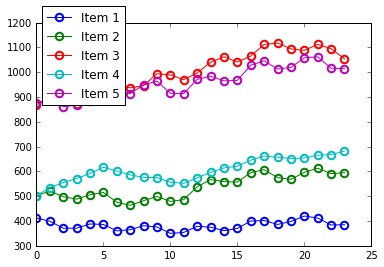

In [6]:
leg = []
for i in range(N):
    plt.plot(range(T), df.iloc[i, :], marker='.', mfc='none', ms=15, mew=2)
    leg.append('Item ' + str(i+1))
plt.legend(leg, numpoints=1, bbox_to_anchor=(0, 1.1), loc='upper left')
plt.show()

In [7]:
def createBasis(basisRange):
    A = []
    for x in basisRange:
        row = [
            1.0,
            x * 1.0,
            np.sin(x * np.pi / 2.0),
            np.cos(x * np.pi / 2.0),
            np.sin(x * np.pi / 6.0),
            np.cos(x * np.pi / 6.0),
            np.sin(x * np.pi / 12.0),
            np.cos(x * np.pi / 12.0)
        ]
        A.append(row)
    return np.asmatrix(A)

In [8]:
def leastSquaresNormE(A, b):
    R = np.linalg.cholesky(np.dot(A.H, A)).H
    w = np.linalg.solve(R.H, np.dot(A.H, b))
    return np.linalg.solve(R, w)

In [9]:
def leastSquaresQR(A, b):
    Q, R = np.linalg.qr(A, mode='reduced')
    return np.linalg.solve(R, np.dot(Q.H, b))

In [10]:
def leastSquaresSVD(A, b):
    U, S, V = np.linalg.svd(A, full_matrices=False)
    return np.dot(V.H, np.linalg.solve(np.diag(S), np.dot(U.H, b)))

In [11]:
A_test = np.matrix([[2, -3], [4, 1]])
b_test = np.matrix([[-2], [24]])
print leastSquaresNormE(A_test, b_test)
print leastSquaresQR(A_test, b_test)
print leastSquaresSVD(A_test, b_test)


[[ 5.]
 [ 4.]]
[[ 5.]
 [ 4.]]
[[ 5.]
 [ 4.]]


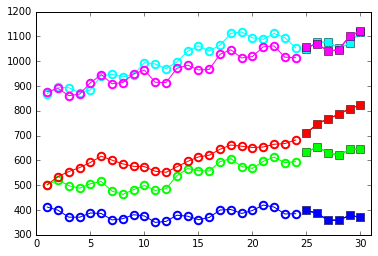

In [14]:
A1 = createBasis(range(1, T+1))
for k in range(N):
    colors = [int(u) for u in bin(k+1)[2:]]
    while len(colors) < 3:
        colors.insert(0, 0)
    b = df.iloc[k, :].reshape(T, 1)
    xNormE = leastSquaresNormE(A1, b)
    xQR = leastSquaresQR(A1, b)
    xSVD = leastSquaresSVD(A1, b)
    A2 = createBasis(range(25, 30 + 1))
    r1 = np.dot(A2, xNormE)
    r2 = np.dot(A2, xQR)
    r3 = np.dot(A2, xSVD)
    plt.plot(range(1, T+1), b, marker='.', mfc='none', ms=15, mew=2, color=colors)
    plt.plot(range(T+1, T+7), r1, marker='s', ms=8, color=colors)
    plt.plot(range(T+1, T+7), r2, marker='+', ms=8, color=colors)
    plt.plot(range(T+1, T+7), r3, marker='x', ms=8, color=colors)
plt.xlim([0, T+7])
plt.show()